### (week4) House Prices: Advanced Regression Techniques
> ```aim```
> + 教師あり学習（回帰問題）の概観を知る
> + scikit-laernを使い回帰を行えるようにする
> + 手法の簡単な比較をする


##### - modules

In [107]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler # 標準化
from sklearn.model_selection import train_test_split # 訓練/テスト
import warnings # 実行に関係ない警告を無視
warnings.filterwarnings(action="ignore")

# algorithm
import sklearn
from sklearn.linear_model import LinearRegression # 線形回帰
from sklearn.svm import SVR # SVM 
from sklearn.tree import DecisionTreeRegressor # 決定木
from sklearn.ensemble import RandomForestRegressor # ランダムフォレスト 

# evaluations
from sklearn.metrics import mean_squared_error # 平均二乗誤差
from sklearn.metrics import mean_absolute_error # 平均絶対誤差
from sklearn.metrics import r2_score #R^2値

# visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# データフレームを綺麗に出力する関数
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

#### 【問題1】練習のために特徴量の選択
> 指定説明変数　`GrLivArea` `YearBuilt` / 目的変数 `SalePrice`

##### -dataset.1

In [8]:
row_df = pd.read_csv("input/train.csv")
df = row_df[["GrLivArea", "YearBuilt", "SalePrice"]]
df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


#### 【問題2】線形回帰による推定と評価
```cf.```
+ (moderu)[sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
+ (evaluation)[sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

##### - EDA ＆ preprocessing

In [13]:
df.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [9]:
df.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


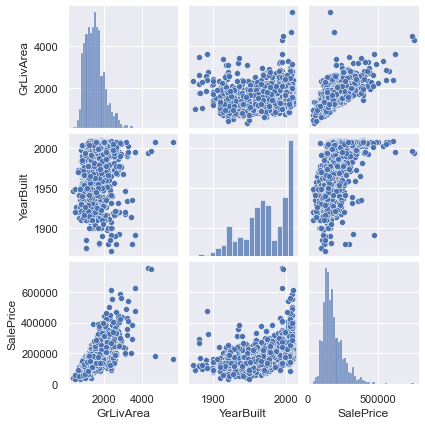

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


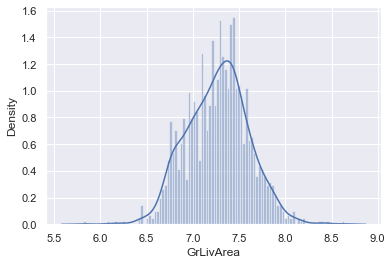

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


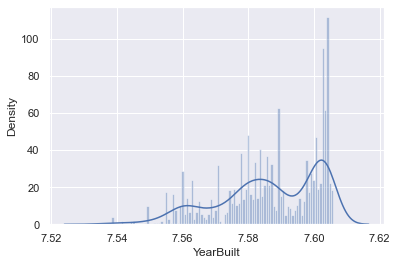

In [69]:
sns.pairplot(df, height=2.0)
plt.show()

sns.distplot(df["GrLivArea"].apply(np.log), bins=100)
plt.show()
sns.distplot(df["YearBuilt"].apply(np.log), bins=100)
plt.show()

##### - ML

In [34]:
# データ準備
X = df.drop(["SalePrice"], axis= 1).values
y = df["SalePrice"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

# 標準化
sts = StandardScaler()
sts.fit(X_train, y_train)
X_train_norm = sts.transform(X_train)
X_test_norm = sts.transform(X_test)

In [39]:
# 線形回帰
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [41]:
# 評価（平均二乗誤差）
mse = mean_squared_error(y_test , linreg_pred)

2725908099.063638

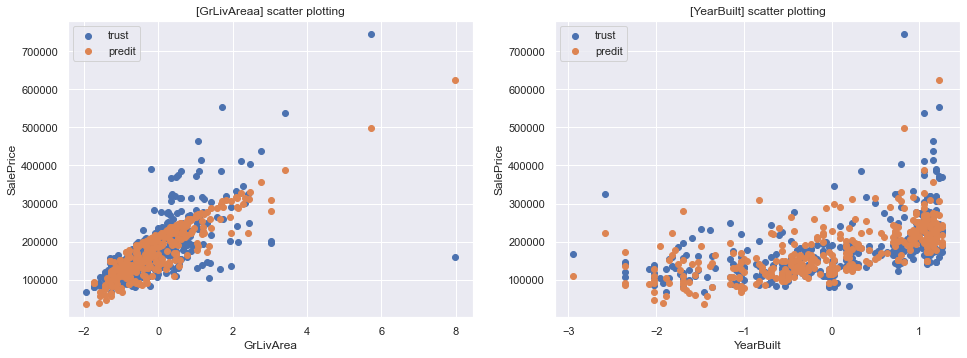

In [102]:
# 可視化
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(2, 2, 1)
plt.title("[GrLivAreaa] scatter plotting")
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea")
plt.scatter(X_test_norm[:, 0], y_test, label="trust")
plt.scatter(X_test_norm[:, 0], linreg_pred, label="predit")
plt.legend(loc='upper left')

ax2 = fig.add_subplot(2, 2, 2)
plt.title("[YearBuilt] scatter plotting")
plt.ylabel("SalePrice")
plt.xlabel("YearBuilt")
plt.scatter(X_test_norm[:, 1], y_test, label="trust")
plt.scatter(X_test_norm[:, 1], linreg_pred, label="predit")
plt.legend(loc='upper left')

plt.show()

#### 【問題3】手法の比較
> ```cf.```
> + [精度評価指標と回帰モデルの評価 - Instruction of chemoinformatics](https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/)
> 

##### - algorithm

In [109]:
# 線形回帰
linreg = LinearRegression()
linreg.fit(X_train_norm, y_train)
linreg_pred = linreg.predict(X_test_norm)
linreg_ev = evaluations(y_test , linreg_pred)

In [110]:
# SVM
svr = SVR()
svr.fit(X_train_norm, y_train)
svr_pred = svr.predict(X_test_norm)
svr_ev = evaluations(y_test, svr_pred)

In [111]:
# 決定木
dtc = DecisionTreeRegressor()
dtc.fit(X_train_norm, y_train)
dtc_pred = dtc.predict(X_test_norm)
dtc_ev = evaluations(y_test,  dtc_pred)

In [113]:
# ランダムフォレスト
rfr = RandomForestRegressor()
rfr.fit(X_train_norm, y_train)
rfr_pred = rfr.predict(X_test_norm)
rfr_ev = evaluations(y_test, rfr_pred)

##### - evaluation

In [108]:
def evaluations(obs , pred):
    MSE = mean_squared_error(obs , pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(obs , pred)
    R2 = r2_score(obs , pred)
    ev_dict = {
        "MSE" : MSE,
        "RMSE" : RMSE,
        "MAE" : MAE,
        "R2" : R2
    }
    return ev_dict

In [133]:
def make_scatter(y_test, X_test_norm, algo_list):
    for i in range(len(algo_list)):
        fig = plt.figure(figsize=(10, 6))
        ax1 = fig.add_subplot(2, 2, 1)
        plt.title("[GrLivAreaa] scatter plotting")
        plt.ylabel("SalePrice")
        plt.xlabel("GrLivArea")
        plt.scatter(X_test_norm[:, 0], y_test, label="trust")
        plt.scatter(X_test_norm[:, 0], algo_list[ i ], label="predit")
        plt.legend(loc='upper left')

        ax2 = fig.add_subplot(2, 2, 2)
        plt.title("[YearBuilt] scatter plotting")
        plt.ylabel("SalePrice")
        plt.xlabel("YearBuilt")
        plt.scatter(X_test_norm[:, 1], y_test, label="trust")
        plt.scatter(X_test_norm[:, 1], algo_list[ i ], label="predit")
        plt.legend(loc='upper left')
        plt.show()

In [135]:
pd.DataFrame([linreg_ev, svr_ev, dtc_ev, rfr_ev], index = ["線形回帰", "SVM", "決定木", "ランダムフォレスト"])

,MSE,RMSE,MAE,R2
線形回帰,2.725908e+09,52210.229832,31844.328697,0.587104
SVM,6.943347e+09,83326.747442,55097.009782,-0.051717
決定木,3.214267e+09,56694.509250,36661.847489,0.513131
ランダムフォレスト,1.756141e+09,41906.340183,28134.286460,0.733995


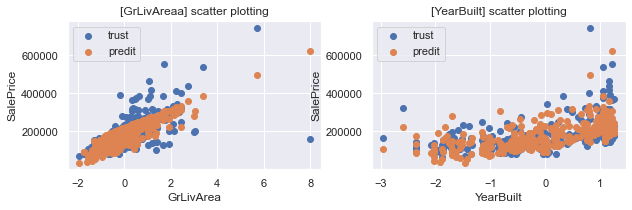

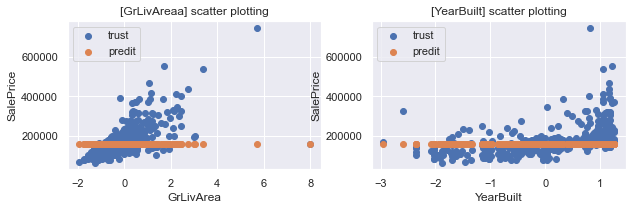

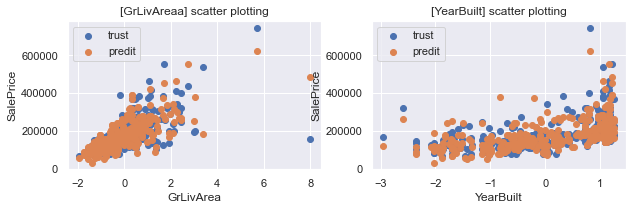

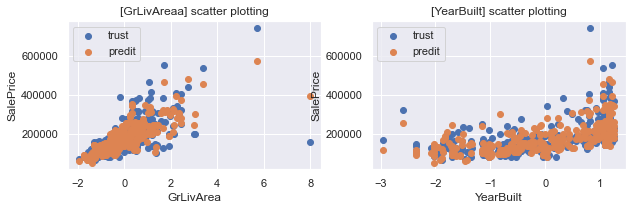

In [134]:
algo_list = [linreg_pred, svr_pred, dtc_pred, rfr_pred]
make_scatter(y_test, X_test_norm, algo_list)

> ```(考察)```
>
>     回帰分析の精度を評価するには、出力の実測値（y_test）を出力の予測値(n_pred)がどの程度再現できているかを検討する必要がある。
>     散布図を確認すると、SVMが著しく予測が実測値と乖離している。
>     一方で、他のモデルに関してはばらつきはあるものの、ある程度包括的に予測できている。

##### - Observed-Predicted Plot (yyplot)
>     評価指標ではありませんが、回帰分析の良し悪しを評価する方法の一つに「Observed-Predicted Plot (yyplot)」があります。
>     yyplot は、横軸に実測値(yobs)、縦軸に予測値(ypred)をプロットしたもので、
>     プロットが対角線付近に多く存在すれば良い予測が行えています。
>
>     (引用)　精度評価指標と回帰モデルの評価 - Instruction of chemoinformatics

In [146]:
# yyplot 作成関数
def yyplot(y_obs, y_pred):
    yvalues = np.concatenate([y_obs.flatten(), y_pred.flatten()])
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(4, 4))
    plt.scatter(y_obs, y_pred)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_observed', fontsize=12)
    plt.ylabel('y_predicted', fontsize=12)
    plt.title('Observed-Predicted Plot', fontsize=18)
    plt.tick_params(labelsize=16)
    plt.show()

    return fig

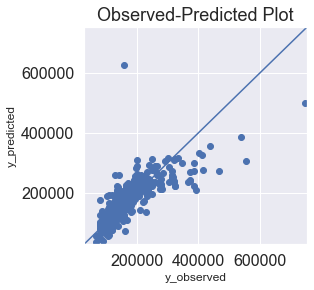

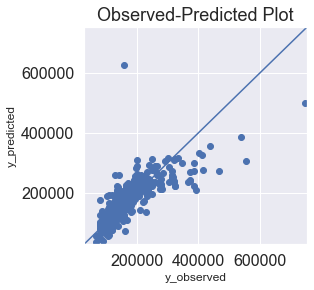

In [147]:
yyplot(y_test.values, linreg_pred)

#### 【問題4】（アドバンス課題）他の特徴量も使用しての学習
> ```Cf.```
> + [House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels)
> + [Beginners_Prediction_Top3% -kaggle](https://www.kaggle.com/marto24/beginners-prediction-top3)

> + [Statistics (scipy.stats)](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
> + [[Python]scipy statsの使い方 - Qiita](https://qiita.com/supersaiakujin/items/71540d1ecd60ced65add)
> + [Scipyの統計モジュールstatsで統計分布を使いこなす - 化学の新しいカタチ](https://future-chem.com/scipy-stats-dist/)

#####  - IMPORTING

In [ ]:
# IMPORTING LIBRARIES & MAIN PATH

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats # 統計モジュール
from scipy.stats import norm # Gausian (Normal Distribution:正規分布)
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

# Defining the working directories

input_path1 = 'input/'

In [ ]:
# IMPORTING DATA

houce_df = 